In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Question 3:

## Hypothesis testing

# Part 1

### Collecting the data

In [2]:
df = pd.read_csv("../Datasets/DS-2/data.csv", 
                usecols=["age_group", "sex", "race", "death_yn"],
                 dtype={"age_group": "category", "sex": "category", "race": "category", "death_yn":"category"})


In [3]:
df.info()
print("Categories for 'age_group':", df["age_group"].cat.categories)
print("Categories for 'sex':", df["sex"].cat.categories)
print("Categories for 'race':", df["race"].cat.categories)
print("Categories for 'death_yn':", df["death_yn"].cat.categories)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 4 columns):
 #   Column     Dtype   
---  ------     -----   
 0   age_group  category
 1   sex        category
 2   race       category
 3   death_yn   category
dtypes: category(4)
memory usage: 72.6 MB
Categories for 'age_group': Index(['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years',
       'Missing'],
      dtype='object')
Categories for 'sex': Index(['Female', 'Male', 'Missing', 'Unknown', 'Other'], dtype='object')
Categories for 'race': Index(['American Indian/Alaska Native', 'Asian', 'Black', 'Missing',
       'Multiple/Other', 'Native Hawaiian/Other Pacific Islander', 'Unknown',
       'White'],
      dtype='object')
Categories for 'death_yn': Index(['Missing', 'No', 'Unknown', 'Yes'], dtype='object')


### Data Cleaning

In [4]:
df = df[(df["age_group"] != "Unknown") & (df["age_group"] != "Missing") & (df["age_group"] != "NA")]
df = df[(df["sex"] != "Missing") & (df["sex"] != "Unknown")]
df = df[(df["race"] != "Missing") & (df["race"] != "Unknown")]
df = df[(df["death_yn"] != "Missing") & (df["death_yn"] != "Unknown")]

df["age_group"] = df["age_group"].cat.remove_unused_categories()
df["sex"] = df["sex"].cat.remove_unused_categories()
df["race"] = df["race"].cat.remove_unused_categories()
df["death_yn"] = df["death_yn"].cat.remove_unused_categories()

df.reset_index(drop=True, inplace=True)

display(df.head())
display(df.info())

,age_group,sex,race,death_yn
0,65+ years,Female,White,No
1,18 to 49 years,Female,Black,No
2,18 to 49 years,Female,White,No
3,50 to 64 years,Female,White,No
4,0 - 17 years,Male,White,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525223 entries, 0 to 5525222
Data columns (total 4 columns):
 #   Column     Dtype   
---  ------     -----   
 0   age_group  category
 1   sex        category
 2   race       category
 3   death_yn   category
dtypes: category(4)
memory usage: 21.1 MB


None

# Test: Chi-Square Test
## The Chi-square test is typically used to determine if there is a signifcant association betweem categorical data.

## 1- Age Group and Death Rate
### Hypothesis statments:
#### Ho: there is no association between age and death rate for COVID-19 patients
#### Ha: there is an association between age and death rate for COVID-19 patients



### Plotting Data

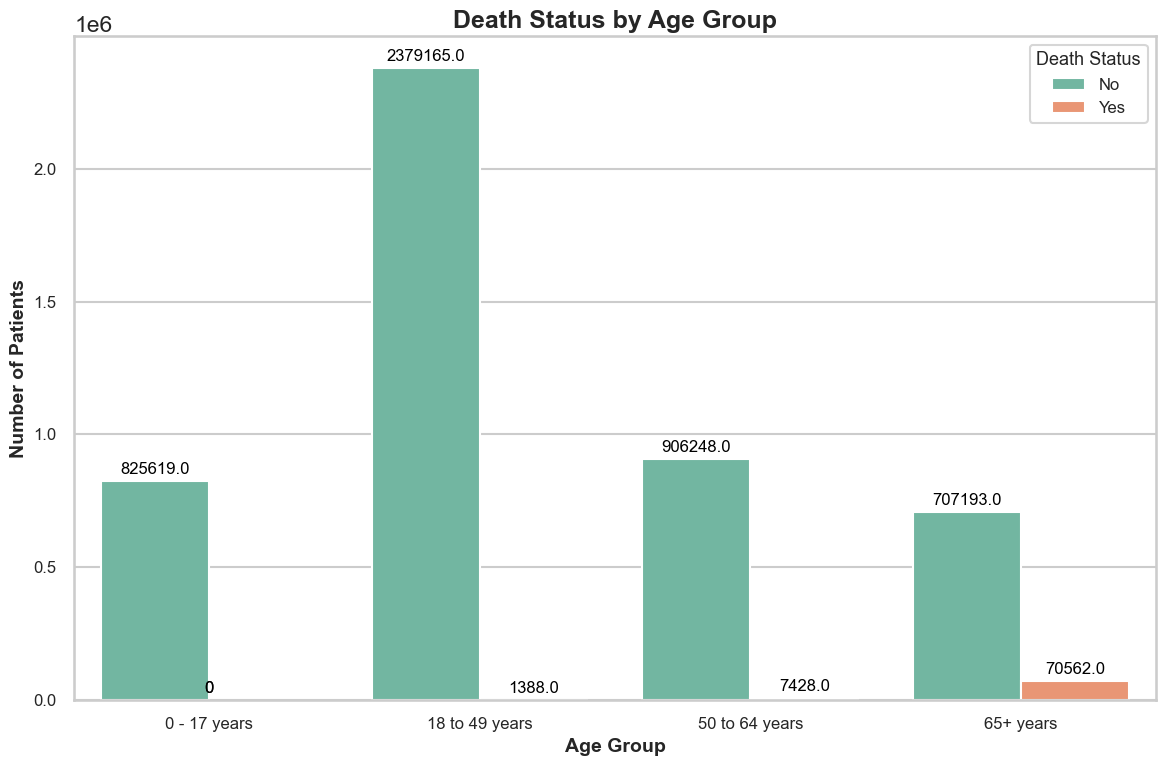

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style and context
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(12, 8))

# Create the countplot
ax = sns.countplot(data=df, x='age_group', hue='death_yn', palette="Set2")

# Add numbers to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Customize labels and title
plt.title('Death Status by Age Group', fontsize=18, weight='bold')
plt.xlabel('Age Group', fontsize=14, weight='bold')
plt.ylabel('Number of Patients', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the legend
plt.legend(title='Death Status', title_fontsize='13', fontsize='12', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Contingency Table

In [6]:
# Create a contingency table
contingency_table3_1 = pd.crosstab(df['age_group'], df['death_yn'])

print(contingency_table3_1)


death_yn             No    Yes
age_group                     
0 - 17 years     825619      0
18 to 49 years  2379165   1388
50 to 64 years   906248   7428
65+ years        707193  70562


### Chi-Square Test Results

In [7]:
from scipy.stats import chi2_contingency

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table3_1)
print(f"\nChi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)
if p < 0.005:
    
    print("\nThe p-value is less than 0.005. There is significant association found between age and death from COVID-19.")

else:
    print("\nThe p-value is greater than or equal to 0.005. No significant association was found.")


Chi2: 324646.1892193214
p-value: 0.0
Degrees of freedom: 3

Expected frequencies:
[[ 812237.76330482   13381.23669518]
 [2341970.13894858   38582.86105142]
 [ 898867.57769056   14808.42230944]
 [ 765149.52005604   12605.47994396]]

The p-value is less than 0.005. There is significant association found between age and death from COVID-19.


## 2- Sex and Death Rate
### Hypothesis statments:
#### Ho: there is no association between sex and death rate for COVID-19 patients
#### Ha: there is an association between sex and death rate for COVID-19 patients



### Plotting Data

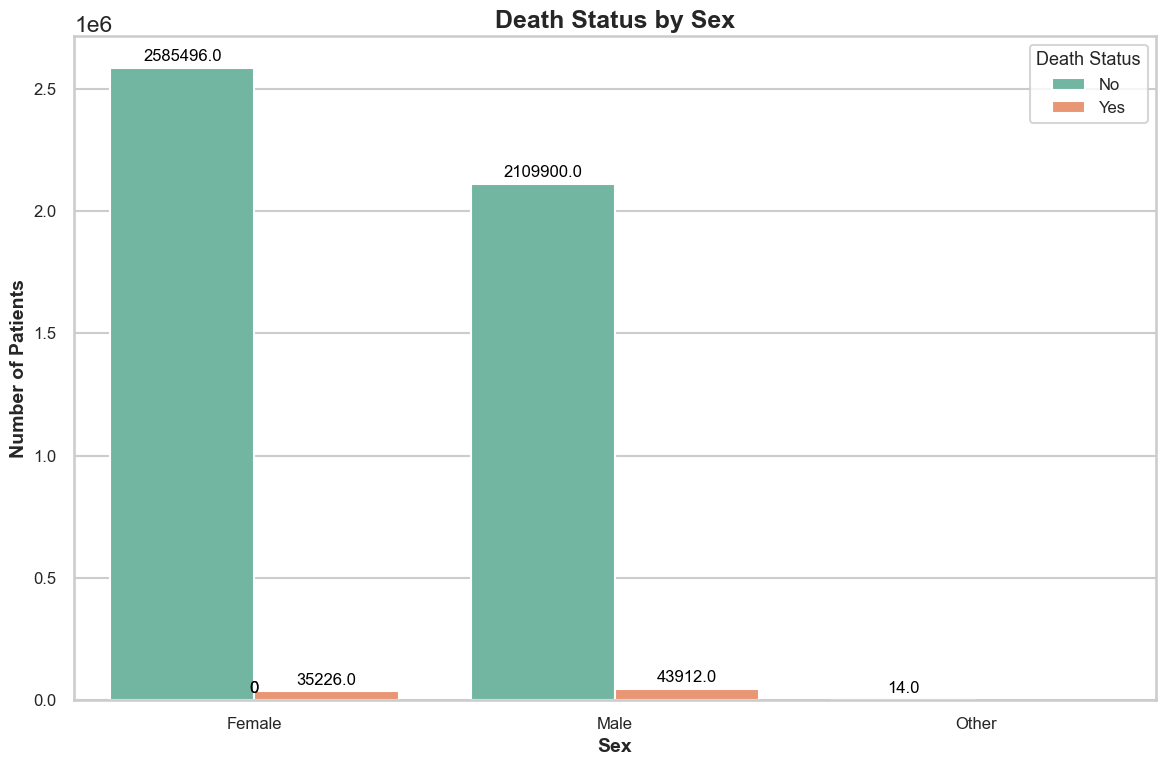

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style and context
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(12, 8))

# Create the countplot
ax = sns.countplot(data=df, x='sex', hue='death_yn', palette="Set2")

# Add numbers to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Customize labels and title
plt.title('Death Status by Sex', fontsize=18, weight='bold')
plt.xlabel('Sex', fontsize=14, weight='bold')
plt.ylabel('Number of Patients', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the legend
plt.legend(title='Death Status', title_fontsize='13', fontsize='12', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Contingency Table

In [11]:
# Create a contingency table
contingency_table3_2 = pd.crosstab(df['sex'], df['death_yn'])

print(contingency_table3_2)


death_yn       No    Yes
sex                     
Female    2585496  35226
Male      2109900  43912
Other          14      0


### Chi-Sqare Test Result

In [12]:

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table3_2)

if p < 0.005:
    print(f"\nChi2: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("\nExpected frequencies:")
    print(expected)
    print("\nThe p-value is less than 0.005. There is significant association found between sex and death from COVID-19.")

else:
    print("\nThe p-value is greater than or equal to 0.005. No significant association was found.")


Chi2: 3500.18092650455
p-value: 0.0
Degrees of freedom: 2

Expected frequencies:
[[2.57728361e+06 4.34383941e+04]
 [2.11811263e+06 3.56993739e+04]
 [1.37679504e+01 2.32049610e-01]]

The p-value is less than 0.005. There is significant association found between sex and death from COVID-19.


## 3- Race and Death Rate
### Hypothesis statments:
#### Ho: there is no association between race and death rate for COVID-19 patients
#### Ha: there is an association between race and death rate for COVID-19 patients



### Data Plotting

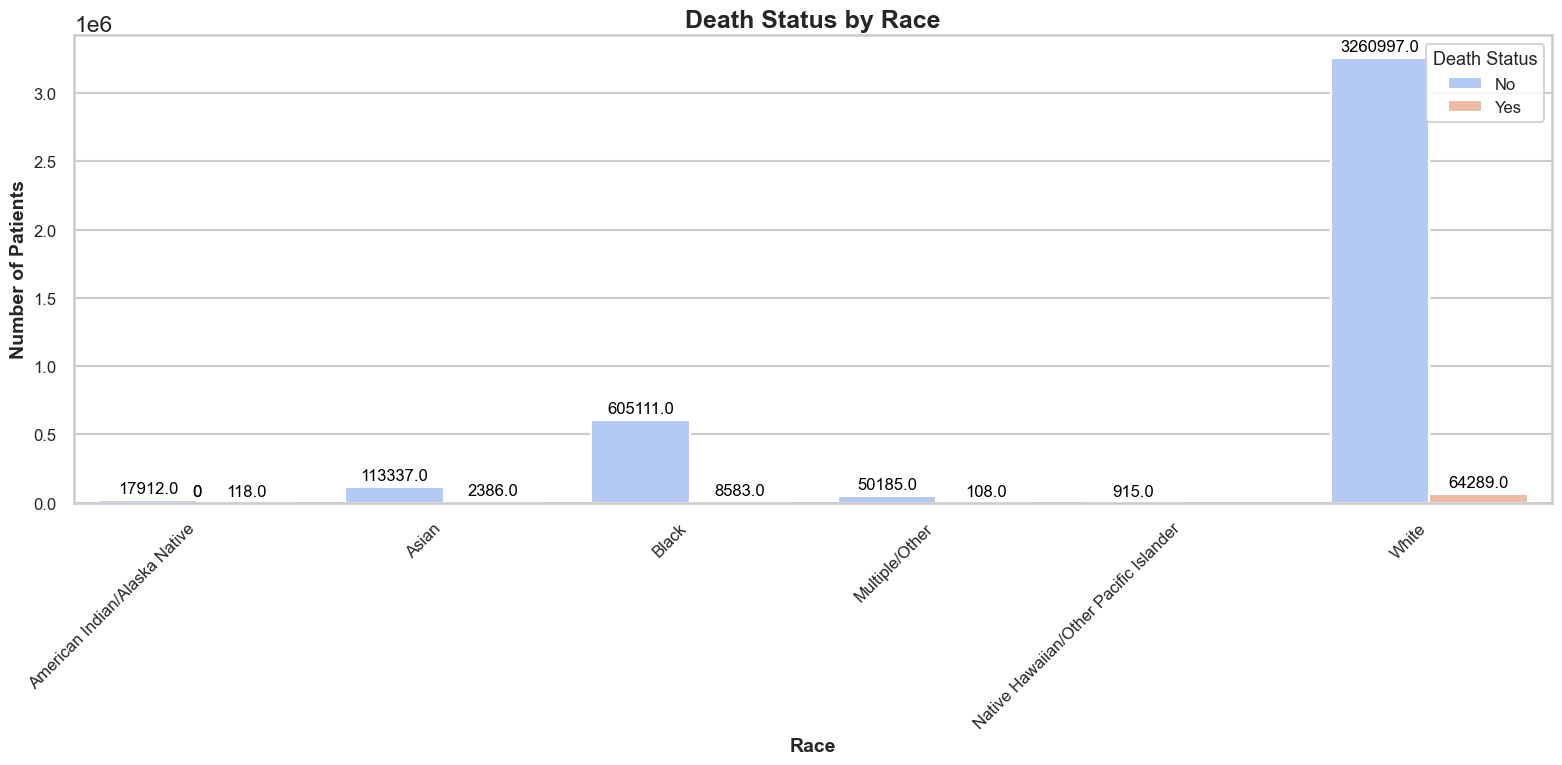

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style and context
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(16, 8))  # Adjusted figure size for better readability

# Create the countplot
ax = sns.countplot(data=df, x='race', hue='death_yn', palette='coolwarm')

# Add numbers to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Customize labels and title
plt.title('Death Status by Race', fontsize=18, weight='bold')
plt.xlabel('Race', fontsize=14, weight='bold')
plt.ylabel('Number of Patients', fontsize=14, weight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Customize the legend
plt.legend(title='Death Status', title_fontsize='13', fontsize='12', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Contingency Table

In [17]:
# Create a contingency table
contingency_table3_3 = pd.crosstab(df['race'], df['death_yn'])

print(contingency_table3_3)

death_yn                                     No    Yes
race                                                  
American Indian/Alaska Native             17912    118
Asian                                    113337   2386
Black                                    605111   8583
Multiple/Other                            50185    108
Native Hawaiian/Other Pacific Islander      915      0
White                                   3260997  64289


### Chi-Sqare Test Result

In [18]:

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table3_3)

if p < 0.005:
    print(f"\nChi2: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("\nExpected frequencies:")
    print(expected)
    print("\nThe p-value is less than 0.005. There is significant association found between race and death from COVID-19.")

else:
    print("\nThe p-value is greater than or equal to 0.005. No significant association was found.")


Chi2: 1753.859070376362
p-value: 0.0
Degrees of freedom: 5

Expected frequencies:
[[1.76999816e+04 3.30018427e+02]
 [1.13604823e+05 2.11817650e+03]
 [6.02461037e+05 1.12329633e+04]
 [4.93724444e+04 9.20555559e+02]
 [8.98251977e+02 1.67480233e+01]
 [3.26442046e+06 6.08655382e+04]]

The p-value is less than 0.005. There is significant association found between race and death from COVID-19.


# Part 2

# My claim:
## There is an association between patients having asymptomatic or symptomatic symptoms and the probablity of death from COVID-19.


## Hypotheses Statement:
#### Ho: the death proportion is the same for patients with symptomatic and asymptomatic symptom status.
#### Ha: the death proportion is not the same for patients with symptomatic and asymptomatic symptom status


### Data Collection

In [19]:
df2 = pd.read_csv("../Datasets/DS-2/data.csv", 
                usecols=["symptom_status", "death_yn"],
                 dtype={"symptom_status": "category", "death_yn":"category"})
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 2 columns):
 #   Column          Dtype   
---  ------          -----   
 0   symptom_status  category
 1   death_yn        category
dtypes: category(2)
memory usage: 36.3 MB
None


### Data Cleaning

In [20]:
df2 = df2[(df2["symptom_status"] != "Missing") & (df2["symptom_status"] != "Unknown")]
df2 = df2[(df2["death_yn"] != "Missing") & (df2["death_yn"] != "Unknown")]

df2["symptom_status"] = df2["symptom_status"].cat.remove_unused_categories()
df2["death_yn"] = df2["death_yn"].cat.remove_unused_categories()

df2.reset_index(drop=True, inplace=True)

display(df2.head())
display(df2.info())

,symptom_status,death_yn
0,Symptomatic,No
1,Symptomatic,No
2,Symptomatic,No
3,Symptomatic,No
4,Symptomatic,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083440 entries, 0 to 3083439
Data columns (total 2 columns):
 #   Column          Dtype   
---  ------          -----   
 0   symptom_status  category
 1   death_yn        category
dtypes: category(2)
memory usage: 5.9 MB


None

### Data Plotting

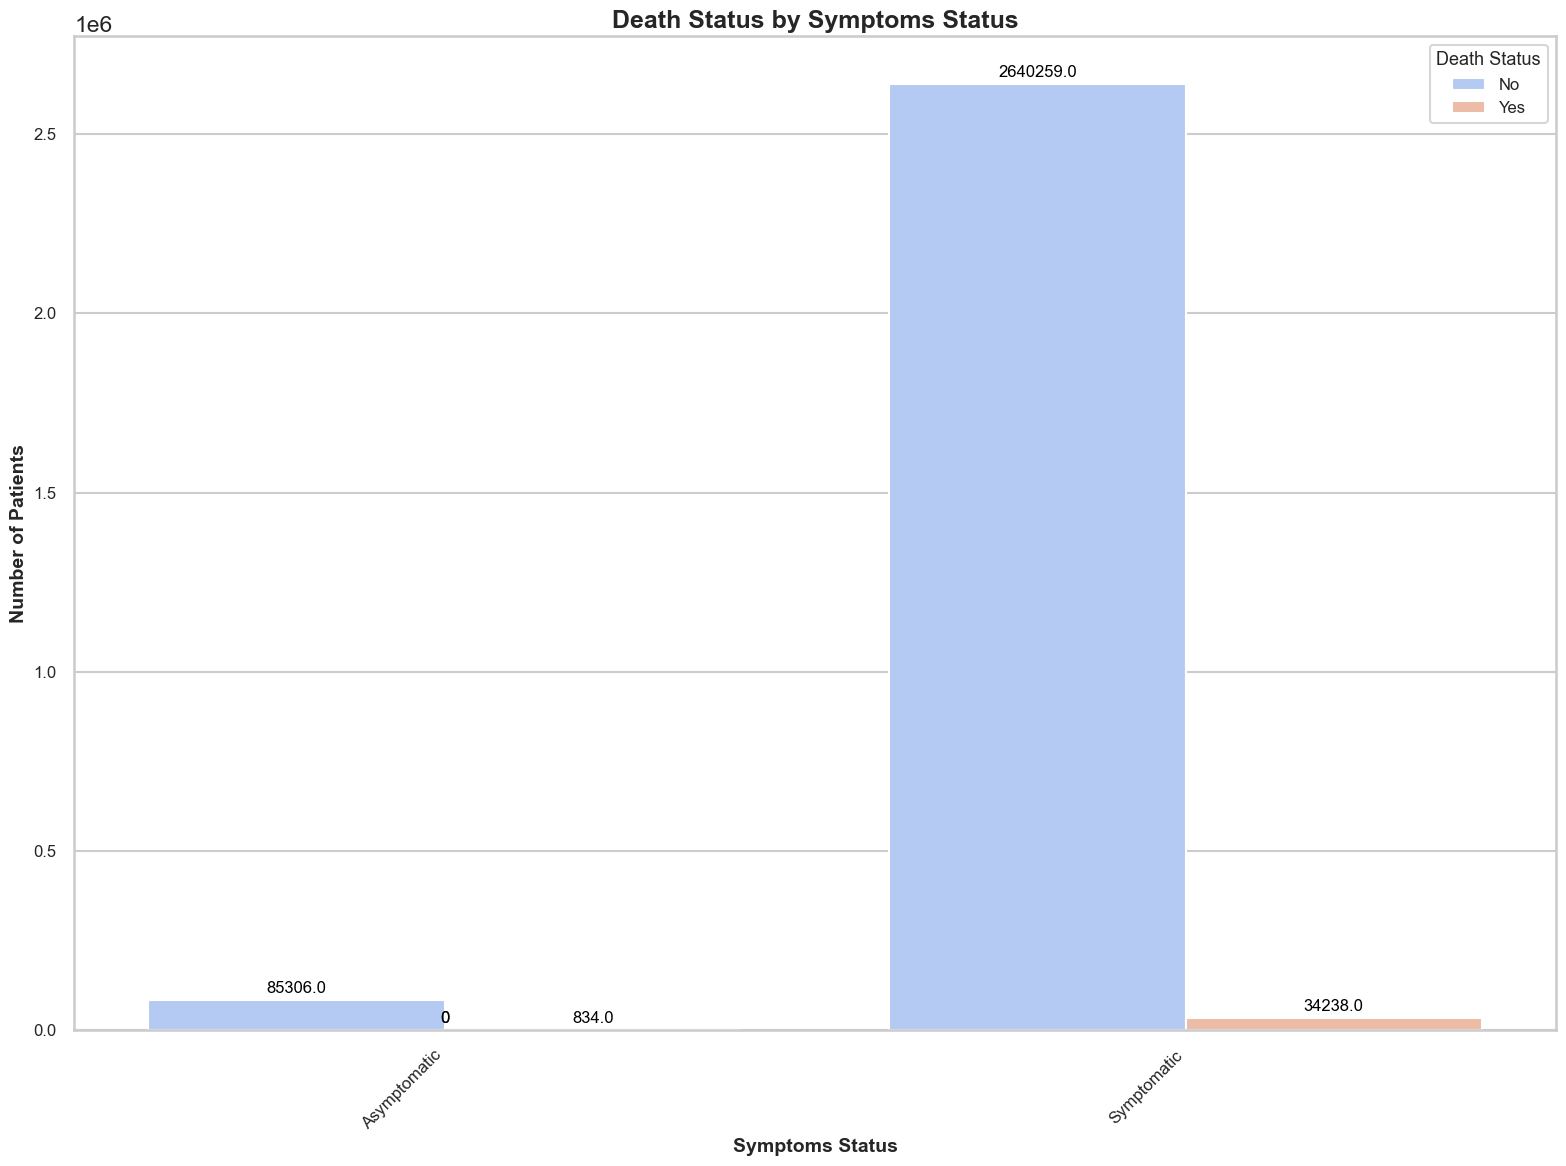

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style and context
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(16, 12))

# Create the countplot
ax = sns.countplot(data=df2, x='symptom_status', hue='death_yn', palette='coolwarm')

# Add numbers to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Customize labels and title
plt.title('Death Status by Symptoms Status', fontsize=18, weight='bold')
plt.xlabel('Symptoms Status', fontsize=14, weight='bold')
plt.ylabel('Number of Patients', fontsize=14, weight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Customize the legend
plt.legend(title='Death Status', title_fontsize='13', fontsize='12', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Z-Test for two population porportion


In [22]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Summarize the data
summary = df2.groupby(["symptom_status", "death_yn"]).size().unstack(fill_value=0)

# Print the summary
print(summary)

# Extract counts for the z-test
asymptomatic_counts = summary.loc["Asymptomatic"].values
symptomatic_counts = summary.loc["Symptomatic"].values

# Number of death cases (Yes) for each symptom status
deaths = np.array([asymptomatic_counts[1], symptomatic_counts[1]])

# Total number of cases for each symptom status
totals = np.array([asymptomatic_counts.sum(), symptomatic_counts.sum()])

# Perform the two-proportion z-test
z_stat, p_value = proportions_ztest(deaths, totals)

# Print the results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")
# Conclusion based on p-value
if p_value < 0.05:
    print("There is a significant difference in the proportions of death between asymptomatic and symptomatic patients.")
else:
    print("There is no significant difference in the proportions of death between asymptomatic and symptomatic patients.")


C:\Users\user\AppData\Local\Temp\ipykernel_20280\2777973928.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df2.groupby(["symptom_status", "death_yn"]).size().unstack(fill_value=0)


death_yn             No    Yes
symptom_status                
Asymptomatic      85306    834
Symptomatic     2640259  34238
Z-statistic: -8.047090626655558
P-value: 8.478539931811714e-16
There is a significant difference in the proportions of death between asymptomatic and symptomatic patients.
